In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, tan, plot_implicit, Eq, And
from scipy import optimize

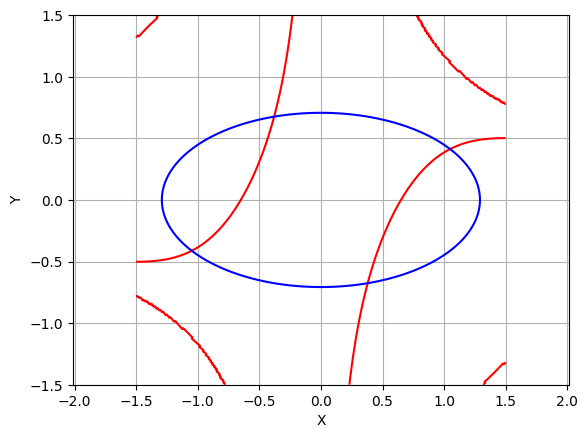

In [4]:
def f1(x1, x2):
    return np.tan(x1 * x2 + 0.4) - x1**2

def f2(x1, x2):
    return 0.6 * x1**2 + 2 * x2**2 - 1

# Создание сетки для x и y
x = np.linspace(-1.5, 1.5, 400)
y = np.linspace(-1.5, 1.5, 400)

X, Y = np.meshgrid(x, y)

# Вычисление значений неявной функции
Z1 = f1(X, Y)
Z2 = f2(X, Y)

# Построение графика
plt.contour(X, Y, Z1, levels=[0], colors='r')
plt.contour(X, Y, Z2, levels=[0], colors='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axis('equal')
plt.show()

Как мы можем видеть, система будет иметь 4 решения. Локализуем корни.

Левый нижний корень лежит на компакте \[-1.2, -1\]x\[-0.5, -0.25\], левый верхний - \[-0.75, -0.5\]x\[0.5, 0.8\], правый нижний - \[0.2, 0.5\]x\[-0.75, -0.5\], правый верхний - \[0.9, 1,2\]x\[0.25, 0.5\].

Напишем свою функцию по поиску корней

In [44]:
# градиент f1, f2
def d_f1(x):
    return [-2 * x[0] + x[1] * (1/np.cos(x[0] * x[1] + 0.4))**2, x[0] * (1/np.cos(x[0] * x[1] + 0.4))**2]

def d_f2(x):
    return [1.2 * x[0], 4 * x[1]]

# якобиан
def Jacobian(x):
    return [(-2 * x[0] + x[1] * (1/np.cos(x[0] * x[1] + 0.4))**2) * (4 * x[1]) - \
            (1.2 * x[0]) * (x[0] * (1/np.cos(x[0] * x[1] + 0.4))**2)]

# функция для решения системы нелинейных уравнений
def Solve_nonlinear(x0, eps=1e-6):
    x = x0
    delta_x = np.array([1, 1])
    itter = 0
    while np.linalg.norm(delta_x) >= eps:
        if Jacobian(x) == 0:
            print('Якобиан равен 0')
            break
        A = np.array([d_f1(x), d_f2(x)])
        b = np.array([- f1(x[0], x[1]), - f2(x[0], x[1])])
        # находим приращение аргумента, решая СЛАУ
        delta_x = np.linalg.solve(A,b)
        x += delta_x
        itter += 1
    return x, itter

In [45]:
root1_newton = Solve_nonlinear([-1., -0.5])
root2_newton = Solve_nonlinear([-0.5, 0.5])
root3_newton = Solve_nonlinear([0.4, -0.5])
root4_newton = Solve_nonlinear([1., 0.5])
print('Корни найденные с помощью написанного метода:')
print(f'корень 1: {root1_newton[0]}, количество итераций: {root1_newton[1]}')
print(f'корень 2: {root2_newton[0]}, количество итераций: {root2_newton[1]}')
print(f'корень 3: {root3_newton[0]}, количество итераций: {root3_newton[1]}')
print(f'корень 4: {root4_newton[0]}, количество итераций: {root4_newton[1]}')

Корни найденные с помощью написанного метода:
корень 1: [-1.04840014 -0.41262228], количество итераций: 4
корень 2: [-0.37984844  0.67580659], количество итераций: 5
корень 3: [ 0.37984844 -0.67580659], количество итераций: 4
корень 4: [1.04840014 0.41262228], количество итераций: 4


In [47]:
def func(x):
    return [np.tan(x[0] * x[1] + 0.4) - x[0]**2, 0.6 * x[0]**2 + 2 * x[1]**2 - 1]

root1 = optimize.fsolve(func, [-1., -0.5],)
root2 = optimize.fsolve(func, [-0.5, 0.5])
root3 = optimize.fsolve(func, [0.4, -0.5])
root4 = optimize.fsolve(func, [1., 0.5])
print(f'Корни найденные с помощью метода scipy.optimize.newton_krylov')
print(f'корень 1: {root1}\nкорень 2: {root2}\nкорень 3: {root3}\nкорень 4: {root4}')

Корни найденные с помощью метода scipy.optimize.newton_krylov
корень 1: [-1.04840014 -0.41262228]
корень 2: [-0.37984844  0.67580659]
корень 3: [ 0.37984844 -0.67580659]
корень 4: [1.04840014 0.41262228]


In [48]:
print('Разница между корнями найденными с помощью встроенной функции и написанной функции:')
print(f'Между 1-ым корнем: {np.linalg.norm(root1 - root1_newton[0])}')
print(f'Между 2-ым корнем: {np.linalg.norm(root2 - root2_newton[0])}')
print(f'Между 3-им корнем: {np.linalg.norm(root3 - root3_newton[0])}')
print(f'Между 4-ым корнем: {np.linalg.norm(root4 - root4_newton[0])}')

Разница между корнями найденными с помощью встроенной функции и написанной функции:
Между 1-ым корнем: 6.151871206722555e-13
Между 2-ым корнем: 1.0251496961130617e-12
Между 3-им корнем: 5.095146739797908e-13
Между 4-ым корнем: 6.15327870707202e-13


Видим, что корни достаточно близки друг к другу

Подставим корни в саму систему и убедимся, что найденные точки - решения

In [43]:
print(f'Значение f1 в точке [-1.04840014 -0.41262228]: {f1(root1_newton[0][0], root1_newton[0][1])}')
print(f'Значение f2 в точке [-1.04840014 -0.41262228]: {f1(root1_newton[0][0], root1_newton[0][1])}\n')
print(f'Значение f1 в точке [-0.37984844  0.67580659]: {f1(root2_newton[0][0], root2_newton[0][1])}')
print(f'Значение f2 в точке [-0.37984844  0.67580659]: {f1(root2_newton[0][0], root2_newton[0][1])}\n')
print(f'Значение f1 в точке [ 0.37984844 -0.67580659]: {f1(root3_newton[0][0], root3_newton[0][1])}')
print(f'Значение f2 в точке [ 0.37984844 -0.67580659]: {f1(root3_newton[0][0], root3_newton[0][1])}\n')
print(f'Значение f1 в точке [1.04840014 0.41262228]: {f1(root4_newton[0][0], root4_newton[0][1])}')
print(f'Значение f2 в точке [1.04840014 0.41262228]: {f1(root4_newton[0][0], root4_newton[0][1])}')

Значение f1 в точке [-1.04840014 -0.41262228]: 0.0
Значение f2 в точке [-1.04840014 -0.41262228]: 0.0

Значение f1 в точке [-0.37984844  0.67580659]: -2.7755575615628914e-17
Значение f2 в точке [-0.37984844  0.67580659]: -2.7755575615628914e-17

Значение f1 в точке [ 0.37984844 -0.67580659]: 1.48020484758149e-13
Значение f2 в точке [ 0.37984844 -0.67580659]: 1.48020484758149e-13

Значение f1 в точке [1.04840014 0.41262228]: 0.0
Значение f2 в точке [1.04840014 0.41262228]: 0.0
